<a href="https://colab.research.google.com/github/yagipong/classifcation-predictions/blob/main/Project_2_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
#loading the dataset
path = '/content/drive/MyDrive/CD_DS/2_Machine_Learning/Week_3/Assignments/Core/adult.csv'
df = pd.read_csv(path)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [12]:
#checking data types and missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [13]:
#checking duplicates
df.duplicated().sum()

52

In [14]:
#dropping duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

In [15]:
#checking categories
for col in df.select_dtypes('object'):
  print(df[col].value_counts())

Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: education, dtype: int64
Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: marital-status, dtype: int64
Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         560

In [16]:
#removing the '?' that is used to represent missing data
df = df.replace('?', np.nan)

Missing values will be addressed using a SimpleImputer as part of a preprocessor pipeline.

##Univariate visuals

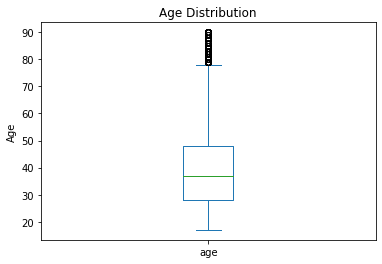

In [29]:
#Age boxplot
df['age'].plot(kind = 'box')
plt.title('Age Distribution')
plt.ylabel('Years');

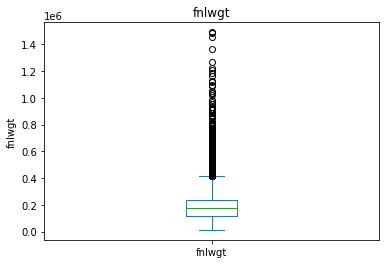

In [28]:
#fnlwgt boxplot
df['fnlwgt'].plot(kind = 'box')
plt.title('fnlwgt')
plt.ylabel('fnlwgt');

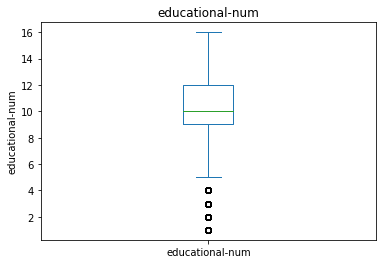

In [30]:
#educational-num boxplot
df['educational-num'].plot(kind = 'box')
plt.title('educational-num')
plt.ylabel('educational-num');

There are a few outliers in educational-num.

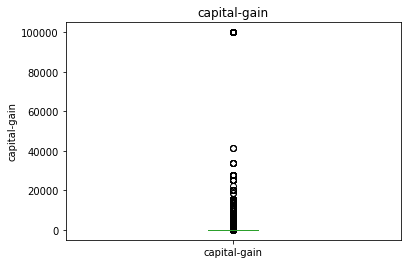

In [31]:
#capital-gain boxplot
df['capital-gain'].plot(kind = 'box')
plt.title('capital-gain')
plt.ylabel('capital-gain');

There is one major outlier in capital gains (99999)

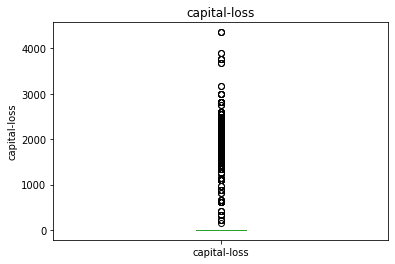

In [32]:
#capital-loss boxplot
df['capital-loss'].plot(kind = 'box')
plt.title('capital-loss')
plt.ylabel('capital-loss');

Capital loss is interesting in that there isn't a neat boxplot for the info - most capital losses could be considered outliers.

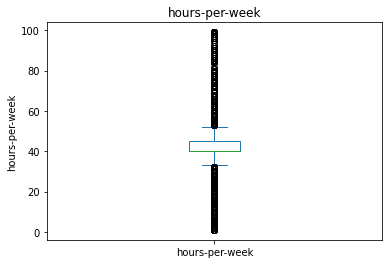

In [33]:
#hours-per-week boxplot
df['hours-per-week'].plot(kind = 'box')
plt.title('hours-per-week')
plt.ylabel('hours-per-week');

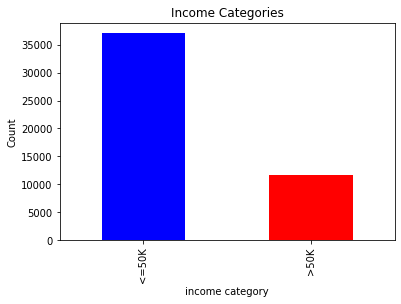

<=50K    37109
>50K     11681
Name: income, dtype: int64

In [38]:
income = df['income'].value_counts()
income.plot(kind = 'bar', color = ['blue', 'red'])
plt.title('Income Categories')
plt.xlabel('income category')
plt.ylabel('Count');
plt.show()

income

The bar graphs indicate a series of imbalances across the data, from the target column to several features such as working class categories, race, gender, and native country.

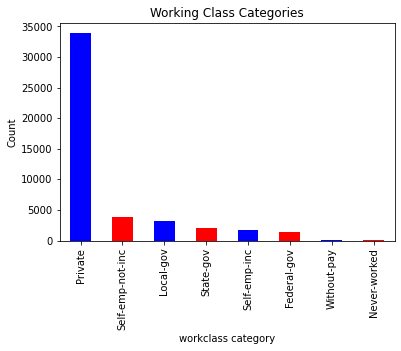

Private             33860
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [39]:
workclass = df['workclass'].value_counts()
workclass.plot(kind = 'bar', color = ['blue', 'red'])
plt.title('Working Class Categories')
plt.xlabel('workclass category')
plt.ylabel('Count');
plt.show()

workclass

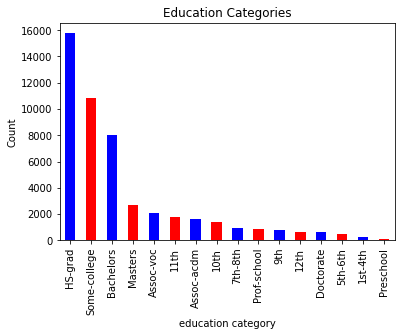

HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: education, dtype: int64

In [40]:
education = df['education'].value_counts()
education.plot(kind = 'bar', color = ['blue', 'red'])
plt.title('Education Categories')
plt.xlabel('education category')
plt.ylabel('Count');
plt.show()

education

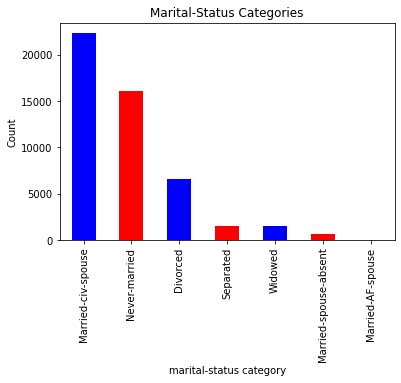

Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [41]:
marital_status = df['marital-status'].value_counts()
marital_status.plot(kind = 'bar', color = ['blue', 'red'])
plt.title('Marital-Status Categories')
plt.xlabel('marital-status category')
plt.ylabel('Count');
plt.show()

marital_status

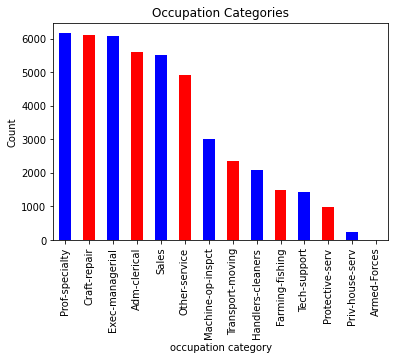

Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: occupation, dtype: int64

In [42]:
occupation = df['occupation'].value_counts()
occupation.plot(kind = 'bar', color = ['blue', 'red'])
plt.title('Occupation Categories')
plt.xlabel('occupation category')
plt.ylabel('Count');
plt.show()

occupation

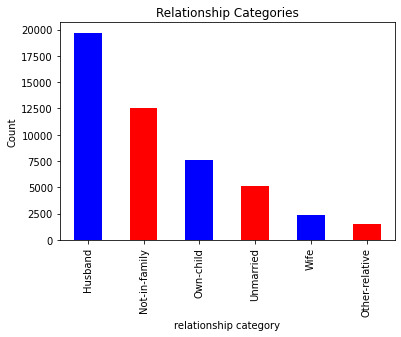

Husband           19703
Not-in-family     12557
Own-child          7569
Unmarried          5124
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [43]:
relationship = df['relationship'].value_counts()
relationship.plot(kind = 'bar', color = ['blue', 'red'])
plt.title('Relationship Categories')
plt.xlabel('relationship category')
plt.ylabel('Count');
plt.show()

relationship

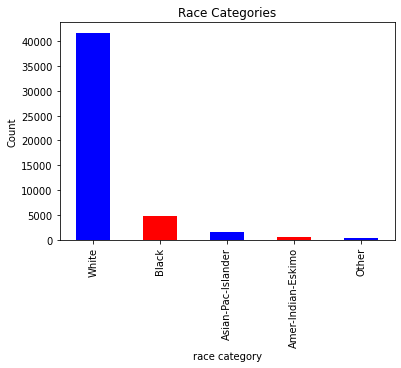

White                 41714
Black                  4683
Asian-Pac-Islander     1517
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [44]:
race = df['race'].value_counts()
race.plot(kind = 'bar', color = ['blue', 'red'])
plt.title('Race Categories')
plt.xlabel('race category')
plt.ylabel('Count');
plt.show()

race

The data heavily skews white.

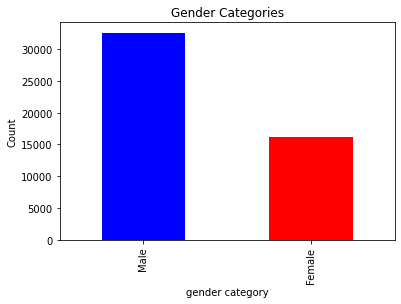

Male      32614
Female    16176
Name: gender, dtype: int64

In [46]:
gender = df['gender'].value_counts()
gender.plot(kind = 'bar', color = ['blue', 'red'])
plt.title('Gender Categories')
plt.xlabel('gender category')
plt.ylabel('Count');
plt.show()

gender

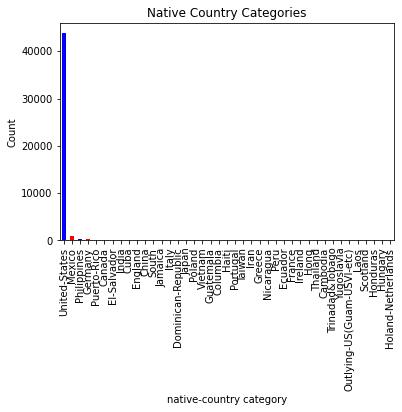

United-States                 43792
Mexico                          943
Philippines                     294
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Vietnam                          86
Guatemala                        86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [47]:
native_country = df['native-country'].value_counts()
native_country.plot(kind = 'bar', color = ['blue', 'red'])
plt.title('Native Country Categories')
plt.xlabel('native-country category')
plt.ylabel('Count');
plt.show()

native_country

Native-country is so skewed to the US that I might consider removing the column. I'm skeptical that the column will add valuable information to the data analysis.